<a href="https://colab.research.google.com/github/dfmunoz11/Modelo_predictivo_SaberPro_2025/blob/main/01_exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# =====================================================
# Exploración de datos - UDEA AI4ENG 20252
# Pruebas Saber Pro - IA para ingenierías
# =====================================================


In [6]:
# Configurar el entorno

!pip install -q kaggle pandas seaborn matplotlib

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Cargar credenciales de Kaggle
# El archivo kaggle.json se carga desde el pc

from google.colab import files
files.upload() # <- Esta linea nos pide subir el archivo
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (3).json


In [9]:
# Descargar los datos

!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
# Descargar los datos

!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
# Carga del archivo train.csv

train_path = os.path.join("data", "train.csv")
df = pd.read_csv(train_path)

# PROCEDEMOS CON LA EXPLORACIÓN.

In [12]:
# Exploración inicial

print("Dimensiones del conjunto de datos:", df.shape)
df.head()

Dimensiones del conjunto de datos: (692500, 21)


,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [13]:
# Información general

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           692500 non-null  int64  
 1   PERIODO_ACADEMICO            692500 non-null  int64  
 2   E_PRGM_ACADEMICO             692500 non-null  object 
 3   E_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   E_HORASSEMANATRABAJA         661643 non-null  object 
 6   F_ESTRATOVIVIENDA            660363 non-null  object 
 7   F_TIENEINTERNET              665871 non-null  object 
 8   F_EDUCACIONPADRE             669322 non-null  object 
 9   F_TIENELAVADORA              652727 non-null  object 
 10  F_TIENEAUTOMOVIL             648877 non-null  object 
 11  E_PRIVADO_LIBERTAD           692500 non-null  object 
 12  E_PAGOMATRICULAPROPIO        686002 non-null  object 
 13 

In [14]:
# Muestra de cuántas clases de rendimiento hay

print("\nDistribución de clases (RENDIMIENTO_GLOBAL):")
print(df['RENDIMIENTO_GLOBAL'].value_counts())


Distribución de clases (RENDIMIENTO_GLOBAL):
RENDIMIENTO_GLOBAL
alto          175619
bajo          172987
medio-bajo    172275
medio-alto    171619
Name: count, dtype: int64


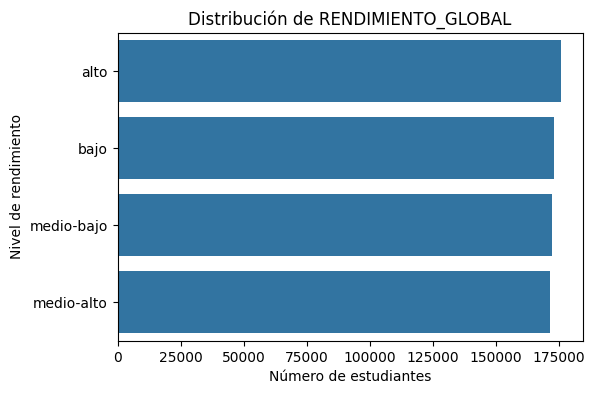

In [15]:
# Visualización del número de estudiantes por nivel de rendimiento

plt.figure(figsize=(6,4))
sns.countplot(y='RENDIMIENTO_GLOBAL', data=df, order=df['RENDIMIENTO_GLOBAL'].value_counts().index)
plt.title("Distribución de RENDIMIENTO_GLOBAL")
plt.xlabel("Número de estudiantes")
plt.ylabel("Nivel de rendimiento")
plt.show()

In [17]:
# Exploración por localidad (comprobar si la columna existe)

if 'ESTU_COD_RESIDE_DEPTO' in df.columns:
    plt.figure(figsize=(8,5))
    top_localidades = df['ESTU_COD_RESIDE_DEPTO'].value_counts().head(10)
    sns.barplot(x=top_localidades.values, y=top_localidades.index)
    plt.title("Top 10 Departamentos por número de estudiantes")
    plt.xlabel("Número de estudiantes")
    plt.ylabel("Departamento")
    plt.show()

In [18]:
# Estadísticas básicas

df.describe(include='all').transpose().head(10)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,692500.0,NaN,NaN,NaN,494606.130576,285585.209455,1.0,247324.75,494564.5,741782.5,989286.0
PERIODO_ACADEMICO,692500.0,NaN,NaN,NaN,20198.366679,10.535037,20183.0,20195.0,20195.0,20203.0,20213.0
E_PRGM_ACADEMICO,692500,948,DERECHO,53244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E_PRGM_DEPARTAMENTO,692500,31,BOGOTÁ,282159,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E_VALORMATRICULAUNIVERSIDAD,686213,8,Entre 1 millón y menos de 2.5 millones,204048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E_HORASSEMANATRABAJA,661643,5,Más de 30 horas,249352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F_ESTRATOVIVIENDA,660363,7,Estrato 2,232671,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F_TIENEINTERNET,665871,2,Si,592514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F_EDUCACIONPADRE,669322,12,Secundaria (Bachillerato) completa,128289,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F_TIENELAVADORA,652727,2,Si,563390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
